In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('20211217_IA_Data_Export.xlsx')

In [3]:
df.columns

Index(['ContractId Anon', 'Reliability', 'Score',
       'BASEUNIT_PRODUCTNAME (copy)', 'ACCESORY_NAME (copy)', 'UPSELL',
       'DAYS_ON_BOOKS', 'BASEUNIT_CONTRACTSTATUS', 'DELINQUENCY',
       'TOTAL_TOKEN_PAID'],
      dtype='object')

In [45]:
# Checking and Removing Duplicate rows
duplicate = df[df.duplicated()]
duplicate

,ContractId Anon,Reliability,Score,BASEUNIT_PRODUCTNAME (copy),ACCESORY_NAME (copy),UPSELL,DAYS_ON_BOOKS,BASEUNIT_CONTRACTSTATUS,DELINQUENCY,TOTAL_TOKEN_PAID


In [77]:
df.shape

(14694, 10)

In [13]:
df.head()

,ContractId Anon,Reliability,Score,BASEUNIT_PRODUCTNAME (copy),ACCESORY_NAME (copy),UPSELL,DAYS_ON_BOOKS,BASEUNIT_CONTRACTSTATUS,DELINQUENCY,TOTAL_TOKEN_PAID
0,31604231,Yes,77,Product 1 (large SHS),TV1,True,0,ACTIVE,0,0
1,31604231,Yes,77,Product 1 (large SHS),TV1,True,1,ACTIVE,1,0
2,31604231,Yes,77,Product 1 (large SHS),TV1,True,2,ACTIVE,-1,1
3,31604231,Yes,77,Product 1 (large SHS),TV1,True,3,ACTIVE,0,1
4,31604231,Yes,77,Product 1 (large SHS),TV1,True,4,ACTIVE,1,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14694 entries, 0 to 14693
Data columns (total 10 columns):
ContractId Anon                14694 non-null int64
Reliability                    14694 non-null object
Score                          14694 non-null int64
BASEUNIT_PRODUCTNAME (copy)    14694 non-null object
ACCESORY_NAME (copy)           14694 non-null object
UPSELL                         14694 non-null bool
DAYS_ON_BOOKS                  14694 non-null int64
BASEUNIT_CONTRACTSTATUS        14694 non-null object
DELINQUENCY                    14694 non-null int64
TOTAL_TOKEN_PAID               14694 non-null int64
dtypes: bool(1), int64(5), object(4)
memory usage: 1.0+ MB


## In Data Analysis What all things we do
1. Missing Values
2. Finding and Removing Outliers
3. Explore about Numerical Variables
4. Explore about categorical Variables
5. Standardization of Variables
6. Finding Relationship between features

In [46]:
# Checking and fixing the missing values
df.isnull().sum()

ContractId Anon                0
Reliability                    0
Score                          0
BASEUNIT_PRODUCTNAME (copy)    0
ACCESORY_NAME (copy)           0
UPSELL                         0
DAYS_ON_BOOKS                  0
BASEUNIT_CONTRACTSTATUS        0
DELINQUENCY                    0
TOTAL_TOKEN_PAID               0
dtype: int64

In [47]:
# Checking and fixing the missing values
df.isna().sum()

ContractId Anon                0
Reliability                    0
Score                          0
BASEUNIT_PRODUCTNAME (copy)    0
ACCESORY_NAME (copy)           0
UPSELL                         0
DAYS_ON_BOOKS                  0
BASEUNIT_CONTRACTSTATUS        0
DELINQUENCY                    0
TOTAL_TOKEN_PAID               0
dtype: int64

In [9]:
df.describe()

,ContractId Anon,Score,DAYS_ON_BOOKS,DELINQUENCY,TOTAL_TOKEN_PAID
count,1.469400e+04,14694.000000,14694.000000,14694.000000,14694.000000
mean,3.197680e+07,63.158568,22.749081,-3.215530,21.213625
std,3.503023e+05,11.895289,14.606497,16.061735,24.723518
min,3.160423e+07,28.000000,0.000000,-269.000000,0.000000
25%,3.170423e+07,56.000000,10.000000,-2.000000,9.000000
50%,3.176301e+07,63.000000,21.000000,-1.000000,18.000000
75%,3.230243e+07,71.000000,34.000000,0.000000,28.000000
max,3.287607e+07,90.000000,57.000000,44.000000,550.000000


In [4]:
df_2 = df.drop(df[(df.TOTAL_TOKEN_PAID >100) & (df.TOTAL_TOKEN_PAID <= 550) ].index)

In [5]:
df_2.describe()

,ContractId Anon,Score,DAYS_ON_BOOKS,DELINQUENCY,TOTAL_TOKEN_PAID
count,1.459500e+04,14595.000000,14595.000000,14595.000000,14595.000000
mean,3.197809e+07,63.146968,22.700103,-2.122987,19.685851
std,3.508740e+05,11.934365,14.607210,6.457991,13.223417
min,3.160423e+07,28.000000,0.000000,-81.000000,0.000000
25%,3.170423e+07,56.000000,10.000000,-2.000000,9.000000
50%,3.176337e+07,63.000000,21.000000,-1.000000,18.000000
75%,3.230243e+07,71.000000,34.000000,0.000000,28.000000
max,3.287607e+07,90.000000,57.000000,44.000000,88.000000


In [61]:
df_2

,ContractId Anon,Reliability,Score,BASEUNIT_PRODUCTNAME (copy),ACCESORY_NAME (copy),UPSELL,DAYS_ON_BOOKS,BASEUNIT_CONTRACTSTATUS,DELINQUENCY,TOTAL_TOKEN_PAID
0,31604231,Yes,77,Product 1 (large SHS),TV1,True,0,ACTIVE,0,0
1,31604231,Yes,77,Product 1 (large SHS),TV1,True,1,ACTIVE,1,0
2,31604231,Yes,77,Product 1 (large SHS),TV1,True,2,ACTIVE,-1,1
3,31604231,Yes,77,Product 1 (large SHS),TV1,True,3,ACTIVE,0,1
4,31604231,Yes,77,Product 1 (large SHS),TV1,True,4,ACTIVE,1,1
...,...,...,...,...,...,...,...,...,...,...
14689,32876071,Yes,44,Product 1 (large SHS),No Accessory,False,10,ACTIVE,-5,15
14690,32876071,Yes,44,Product 1 (large SHS),No Accessory,False,11,ACTIVE,-4,15
14691,32876071,Yes,44,Product 1 (large SHS),No Accessory,False,12,ACTIVE,-3,15
14692,32876071,Yes,44,Product 1 (large SHS),No Accessory,False,13,ACTIVE,-2,15


In [6]:
# TOTAL_TOKEN_PAID max value is 550 which is far bigger than its mean (21.213625) So basically it can be assumed as outlier
df_ = df.drop(df[df.TOTAL_TOKEN_PAID == 550].index)

In [7]:
df_

,ContractId Anon,Reliability,Score,BASEUNIT_PRODUCTNAME (copy),ACCESORY_NAME (copy),UPSELL,DAYS_ON_BOOKS,BASEUNIT_CONTRACTSTATUS,DELINQUENCY,TOTAL_TOKEN_PAID
0,31604231,Yes,77,Product 1 (large SHS),TV1,True,0,ACTIVE,0,0
1,31604231,Yes,77,Product 1 (large SHS),TV1,True,1,ACTIVE,1,0
2,31604231,Yes,77,Product 1 (large SHS),TV1,True,2,ACTIVE,-1,1
3,31604231,Yes,77,Product 1 (large SHS),TV1,True,3,ACTIVE,0,1
4,31604231,Yes,77,Product 1 (large SHS),TV1,True,4,ACTIVE,1,1
...,...,...,...,...,...,...,...,...,...,...
14689,32876071,Yes,44,Product 1 (large SHS),No Accessory,False,10,ACTIVE,-5,15
14690,32876071,Yes,44,Product 1 (large SHS),No Accessory,False,11,ACTIVE,-4,15
14691,32876071,Yes,44,Product 1 (large SHS),No Accessory,False,12,ACTIVE,-3,15
14692,32876071,Yes,44,Product 1 (large SHS),No Accessory,False,13,ACTIVE,-2,15


In [50]:
df_.describe()

,ContractId Anon,Score,DAYS_ON_BOOKS,DELINQUENCY,TOTAL_TOKEN_PAID
count,1.468400e+04,14684.000000,14684.000000,14684.000000,14684.000000
mean,3.197659e+07,63.158676,22.741760,-3.217720,20.853514
std,3.503307e+05,11.899338,14.608582,16.066984,20.520828
min,3.160423e+07,28.000000,0.000000,-269.000000,0.000000
25%,3.170423e+07,56.000000,10.000000,-2.000000,9.000000
50%,3.176301e+07,63.000000,21.000000,-1.000000,18.000000
75%,3.230243e+07,71.000000,34.000000,0.000000,28.000000
max,3.287607e+07,90.000000,57.000000,44.000000,300.000000


In [51]:
df.describe()

,ContractId Anon,Score,DAYS_ON_BOOKS,DELINQUENCY,TOTAL_TOKEN_PAID
count,1.469400e+04,14694.000000,14694.000000,14694.000000,14694.000000
mean,3.197680e+07,63.158568,22.749081,-3.215530,21.213625
std,3.503023e+05,11.895289,14.606497,16.061735,24.723518
min,3.160423e+07,28.000000,0.000000,-269.000000,0.000000
25%,3.170423e+07,56.000000,10.000000,-2.000000,9.000000
50%,3.176301e+07,63.000000,21.000000,-1.000000,18.000000
75%,3.230243e+07,71.000000,34.000000,0.000000,28.000000
max,3.287607e+07,90.000000,57.000000,44.000000,550.000000


In [ ]:
custid= df_2['ContractId Anon'].unique()
grouped = df_2.groupby(df_2['ContractId Anon'])

final_df_2 = pd.DataFrame()

for id_ in custid:
    print(id_)
    df_new = grouped.get_group(id_)
    uniquescore = df_new.Score.unique()
    for score in uniquescore:
#         print(max(df_new['TOTAL_TOKEN_PAID']))
        df_new_2 = df_new[df_new['Score'] == score]
#         print(df_new_2.iloc[[-1]])
        final_df_2 = pd.concat([final_df_2, df_new_2.iloc[[-1]]], axis=0)

In [9]:
final_df_2

,ContractId Anon,Reliability,Score,BASEUNIT_PRODUCTNAME (copy),ACCESORY_NAME (copy),UPSELL,DAYS_ON_BOOKS,BASEUNIT_CONTRACTSTATUS,DELINQUENCY,TOTAL_TOKEN_PAID
57,31604231,Yes,77,Product 1 (large SHS),TV1,True,57,ACTIVE,11,10
115,31610571,Yes,62,Product 1 (large SHS),TV1,False,57,ACTIVE,-1,56
172,31620571,Yes,73,Product 1 (large SHS),TV1,True,56,ACTIVE,-2,54
229,31622411,Yes,59,Product 1 (large SHS),TV1,True,56,ACTIVE,1,21
286,31623051,Yes,78,Product 1 (large SHS),No Accessory,False,56,ACTIVE,-1,53
...,...,...,...,...,...,...,...,...,...,...
14628,32697791,Yes,70,Product 1 (large SHS),No Accessory,False,22,ACTIVE,-1,22
14646,32832611,Yes,49,Product 1 (large SHS),No Accessory,False,17,ACTIVE,0,8
14662,32854171,Yes,49,Product 5 (phone - new),No Accessory,False,15,ACTIVE,-44,59
14678,32855911,Yes,53,Product 1 (large SHS),No Accessory,False,15,ACTIVE,-5,20


In [10]:
final_df_2.describe()

,ContractId Anon,Score,DAYS_ON_BOOKS,DELINQUENCY,TOTAL_TOKEN_PAID
count,3.360000e+02,336.000000,336.000000,336.000000,336.000000
mean,3.207124e+07,63.032738,42.437500,-1.523810,33.145833
std,3.794633e+05,12.050719,11.361192,8.434437,14.301639
min,3.160423e+07,28.000000,3.000000,-77.000000,1.000000
25%,3.171384e+07,54.000000,32.000000,-2.000000,23.000000
50%,3.200508e+07,63.000000,48.000000,-1.000000,32.500000
75%,3.246318e+07,71.000000,52.000000,0.000000,43.000000
max,3.287607e+07,90.000000,57.000000,44.000000,88.000000


In [ ]:
custid= df['ContractId Anon'].unique()
grouped = df.groupby(df['ContractId Anon'])

final_df = pd.DataFrame()

for id_ in custid:
    print(id_)
    df_new = grouped.get_group(id_)
    uniquescore = df_new.Score.unique()
    for score in uniquescore:
#         print(max(df_new['TOTAL_TOKEN_PAID']))
        df_new_2 = df_new[df_new['Score'] == score]
#         print(df_new_2.iloc[[-1]])
        final_df = pd.concat([final_df, df_new_2.iloc[[-1]]], axis=0)

In [67]:
final_df

,ContractId Anon,Reliability,Score,BASEUNIT_PRODUCTNAME (copy),ACCESORY_NAME (copy),UPSELL,DAYS_ON_BOOKS,BASEUNIT_CONTRACTSTATUS,DELINQUENCY,TOTAL_TOKEN_PAID
57,31604231,Yes,77,Product 1 (large SHS),TV1,True,57,ACTIVE,11,10
115,31610571,Yes,62,Product 1 (large SHS),TV1,False,57,ACTIVE,-1,56
172,31620571,Yes,73,Product 1 (large SHS),TV1,True,56,ACTIVE,-2,54
229,31622411,Yes,59,Product 1 (large SHS),TV1,True,56,ACTIVE,1,21
286,31623051,Yes,78,Product 1 (large SHS),No Accessory,False,56,ACTIVE,-1,53
...,...,...,...,...,...,...,...,...,...,...
14628,32697791,Yes,70,Product 1 (large SHS),No Accessory,False,22,ACTIVE,-1,22
14646,32832611,Yes,49,Product 1 (large SHS),No Accessory,False,17,ACTIVE,0,8
14662,32854171,Yes,49,Product 5 (phone - new),No Accessory,False,15,ACTIVE,-44,59
14678,32855911,Yes,53,Product 1 (large SHS),No Accessory,False,15,ACTIVE,-5,20


In [69]:
final_df.describe()

,ContractId Anon,Score,DAYS_ON_BOOKS,DELINQUENCY,TOTAL_TOKEN_PAID
count,3.360000e+02,336.000000,336.000000,336.000000,336.000000
mean,3.207124e+07,63.032738,42.732143,-2.261905,35.705357
std,3.794633e+05,12.050719,11.014765,17.236109,35.878228
min,3.160423e+07,28.000000,14.000000,-249.000000,1.000000
25%,3.171384e+07,54.000000,32.000000,-2.000000,23.000000
50%,3.200508e+07,63.000000,48.000000,-1.000000,32.500000
75%,3.246318e+07,71.000000,52.000000,0.000000,43.000000
max,3.287607e+07,90.000000,57.000000,44.000000,550.000000


In [11]:
duplicate = final_df_2[final_df_2.duplicated()]
duplicate

,ContractId Anon,Reliability,Score,BASEUNIT_PRODUCTNAME (copy),ACCESORY_NAME (copy),UPSELL,DAYS_ON_BOOKS,BASEUNIT_CONTRACTSTATUS,DELINQUENCY,TOTAL_TOKEN_PAID


In [12]:
final_df_2.shape

(336, 10)

In [13]:
final_df_2.head()

,ContractId Anon,Reliability,Score,BASEUNIT_PRODUCTNAME (copy),ACCESORY_NAME (copy),UPSELL,DAYS_ON_BOOKS,BASEUNIT_CONTRACTSTATUS,DELINQUENCY,TOTAL_TOKEN_PAID
57,31604231,Yes,77,Product 1 (large SHS),TV1,True,57,ACTIVE,11,10
115,31610571,Yes,62,Product 1 (large SHS),TV1,False,57,ACTIVE,-1,56
172,31620571,Yes,73,Product 1 (large SHS),TV1,True,56,ACTIVE,-2,54
229,31622411,Yes,59,Product 1 (large SHS),TV1,True,56,ACTIVE,1,21
286,31623051,Yes,78,Product 1 (large SHS),No Accessory,False,56,ACTIVE,-1,53


In [73]:
final_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 57 to 14693
Data columns (total 10 columns):
ContractId Anon                336 non-null int64
Reliability                    336 non-null object
Score                          336 non-null int64
BASEUNIT_PRODUCTNAME (copy)    336 non-null object
ACCESORY_NAME (copy)           336 non-null object
UPSELL                         336 non-null bool
DAYS_ON_BOOKS                  336 non-null int64
BASEUNIT_CONTRACTSTATUS        336 non-null object
DELINQUENCY                    336 non-null int64
TOTAL_TOKEN_PAID               336 non-null int64
dtypes: bool(1), int64(5), object(4)
memory usage: 26.6+ KB


In [14]:
final_df_2.describe()

,ContractId Anon,Score,DAYS_ON_BOOKS,DELINQUENCY,TOTAL_TOKEN_PAID
count,3.360000e+02,336.000000,336.000000,336.000000,336.000000
mean,3.207124e+07,63.032738,42.437500,-1.523810,33.145833
std,3.794633e+05,12.050719,11.361192,8.434437,14.301639
min,3.160423e+07,28.000000,3.000000,-77.000000,1.000000
25%,3.171384e+07,54.000000,32.000000,-2.000000,23.000000
50%,3.200508e+07,63.000000,48.000000,-1.000000,32.500000
75%,3.246318e+07,71.000000,52.000000,0.000000,43.000000
max,3.287607e+07,90.000000,57.000000,44.000000,88.000000


In [15]:
final_df_2['repayment performance'] = final_df_2['TOTAL_TOKEN_PAID']/final_df_2['DAYS_ON_BOOKS']

In [16]:
final_df_2.describe()

,ContractId Anon,Score,DAYS_ON_BOOKS,DELINQUENCY,TOTAL_TOKEN_PAID,repayment performance
count,3.360000e+02,336.000000,336.000000,336.000000,336.000000,336.000000
mean,3.207124e+07,63.032738,42.437500,-1.523810,33.145833,0.870730
std,3.794633e+05,12.050719,11.361192,8.434437,14.301639,1.169535
min,3.160423e+07,28.000000,3.000000,-77.000000,1.000000,0.020000
25%,3.171384e+07,54.000000,32.000000,-2.000000,23.000000,0.585882
50%,3.200508e+07,63.000000,48.000000,-1.000000,32.500000,0.807072
75%,3.246318e+07,71.000000,52.000000,0.000000,43.000000,0.965517
max,3.287607e+07,90.000000,57.000000,44.000000,88.000000,20.000000


In [17]:
numeric_features = final_df_2.select_dtypes(include=[np.number])
numeric_features.columns

Index(['ContractId Anon', 'Score', 'DAYS_ON_BOOKS', 'DELINQUENCY',
       'TOTAL_TOKEN_PAID', 'repayment performance'],
      dtype='object')

In [18]:
categorical_features = final_df_2.select_dtypes(include=[np.object])
categorical_features.columns

Index(['Reliability', 'BASEUNIT_PRODUCTNAME (copy)', 'ACCESORY_NAME (copy)',
       'BASEUNIT_CONTRACTSTATUS'],
      dtype='object')

In [32]:
# By default pandas provides pearson correlation coefficient 
correlation = numeric_features.corr()
print(correlation['Score'].sort_values(ascending = False), '\n')

Score                    1.000000
TOTAL_TOKEN_PAID         0.086193
DAYS_ON_BOOKS            0.036350
repayment performance    0.028211
DELINQUENCY             -0.024442
ContractId Anon         -0.035909
Name: Score, dtype: float64 



In [20]:
# Using other correlation method 'Kendall' we got different numbers but the relation between varaibles with Score is same
correlation = numeric_features.corr(method='kendall')
print(correlation['Score'].sort_values(ascending = False), '\n')

Score                    1.000000
repayment performance    0.074297
TOTAL_TOKEN_PAID         0.064121
DAYS_ON_BOOKS            0.018735
ContractId Anon         -0.017824
DELINQUENCY             -0.022613
Name: Score, dtype: float64 



In [21]:
# Using other correlation method 'spearman' we got different numbers but the relation between varaibles with Score is same
correlation = numeric_features.corr(method='spearman')
print(correlation['Score'].sort_values(ascending = False), '\n')

Score                    1.000000
repayment performance    0.106426
TOTAL_TOKEN_PAID         0.092609
DAYS_ON_BOOKS            0.025406
ContractId Anon         -0.025173
DELINQUENCY             -0.033624
Name: Score, dtype: float64 



<AxesSubplot:title={'center':'Correlation of Numeric Features with Score'}>

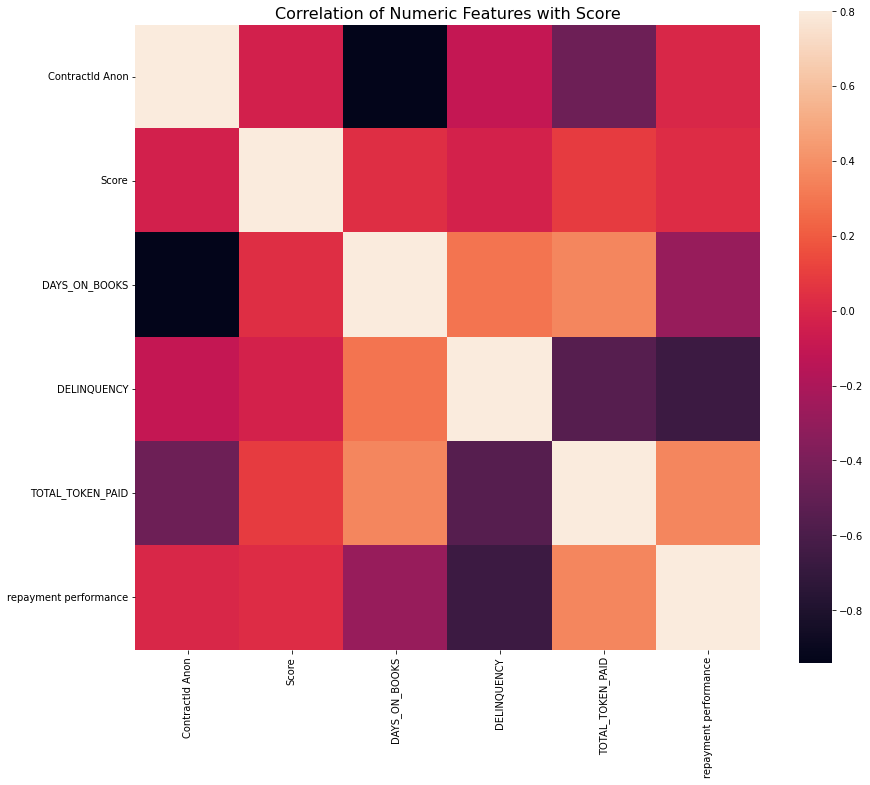

In [33]:
f, ax = plt.subplots(figsize = (14,12))

plt.title('Correlation of Numeric Features with Score', y=1, size=16)

sns.heatmap(correlation, square = True, vmax=0.8)

## Following are the observations from above heat map for Numerical Features
1. "Repayment Performance" and "Score" has the positive correlation between them. Although the correlation value is very small.
2. We may skip one of the features out of ("Repayment Performance" , "TOTAL_TOKEN_PAID") when training our machine learning model. because both of these ("Repayment Performance" , "TOTAL_TOKEN_PAID") features have the same correlation with the "Score" feature.
3. "DELINQUENCY" and "Score" has the negative correlation between them. Although the correlation value is very small. but if the "DELINQUENCY" feature increases then "Score" will tend to decrease.

In [23]:
final_df_2.UPSELL.value_counts()

False    237
True      99
Name: UPSELL, dtype: int64

In [24]:
final_df_2['ContractId Anon'].value_counts()

32400871    3
31993051    2
31792031    2
32275131    2
31990311    2
           ..
31774671    1
32608871    1
31642451    1
31765671    1
32634971    1
Name: ContractId Anon, Length: 327, dtype: int64

In [25]:
final_df_2['ContractId Anon'].unique().shape

(327,)

In [26]:
final_df_2.Reliability.value_counts()

Yes    336
Name: Reliability, dtype: int64

In [27]:
final_df_2['BASEUNIT_PRODUCTNAME (copy)'].value_counts()

Product 1 (large SHS)      317
Product 7 (phone - new)      8
Product 3 (small SHS)        3
Product 2 (large SHS)        3
Product 5 (phone - new)      3
Product 8 (phone - new)      2
Name: BASEUNIT_PRODUCTNAME (copy), dtype: int64

In [28]:
cid_product_wise =final_df_2.groupby(['ContractId Anon','BASEUNIT_PRODUCTNAME (copy)']).size().reset_index().rename(columns={0:'ContractId product wise Count'})
cid_product_wise

,ContractId Anon,BASEUNIT_PRODUCTNAME (copy),ContractId product wise Count
0,31604231,Product 1 (large SHS),1
1,31610571,Product 1 (large SHS),1
2,31620571,Product 1 (large SHS),1
3,31622411,Product 1 (large SHS),1
4,31623051,Product 1 (large SHS),1
...,...,...,...
322,32697791,Product 1 (large SHS),1
323,32832611,Product 1 (large SHS),1
324,32854171,Product 5 (phone - new),1
325,32855911,Product 1 (large SHS),1


<AxesSubplot:xlabel='ContractId Anon', ylabel='ContractId product wise Count'>

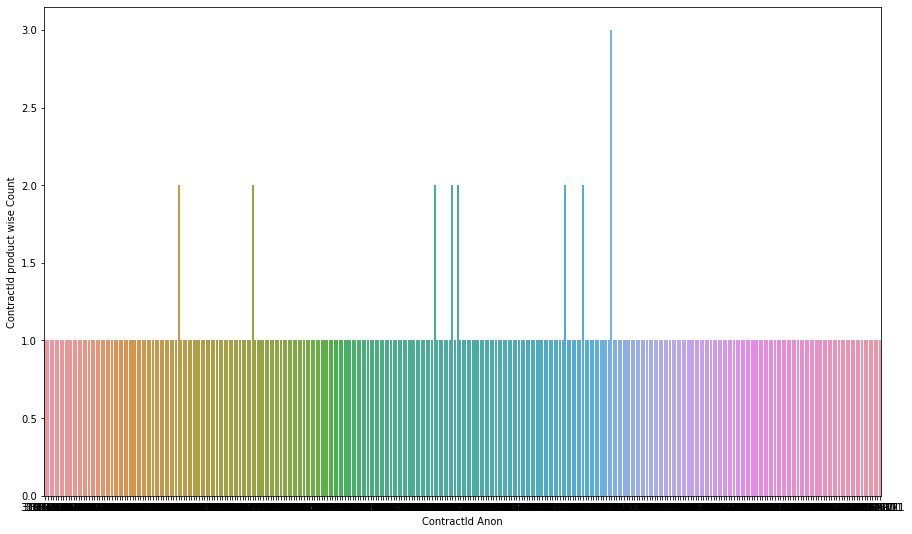

In [30]:
plt.rcParams['figure.figsize']=(15,9)
sns.barplot(x='ContractId Anon', y='ContractId product wise Count',data=cid_product_wise)

### Observations
1. Most number of contracts are using 'Product 1(large SHS)'
2. From the above result we can pick the top customers/contracts ids for which score is changing mostly and using different(Multiple) 'BASEUNIT_PRODUCTNAME (copy)' products.


In [31]:
final_df_2['ACCESORY_NAME (copy)'].value_counts()

No Accessory    203
TV1             130
TV4               2
TV2               1
Name: ACCESORY_NAME (copy), dtype: int64

## Observations
1. Most number of contracts fall in 'No Accessory' and 'TV1' category of 'ACCESORY_NAME (copy)'

In [95]:
final_df_2.BASEUNIT_CONTRACTSTATUS.value_counts()

ACTIVE    336
Name: BASEUNIT_CONTRACTSTATUS, dtype: int64

In [96]:
final_df_2.BASEUNIT_CONTRACTSTATUS.value_counts().values[0]/df.shape[0]

0.022866476112699062

In [97]:
final_df_2.BASEUNIT_CONTRACTSTATUS.value_counts().values[1]/df.shape[0]

IndexError: index 1 is out of bounds for axis 0 with size 1

## Observations
1. 99.93% contracts are in acitive repayment state.
2. only .068% contracts are paid off(has completed the full repayment) for the day of record. (These are the outliers which we have removed in the initial phase of Analysis)

In [98]:
final_df_2.UPSELL.value_counts().index

Index([False, True], dtype='object')

In [99]:
final_df_2.UPSELL.value_counts().values

array([237,  99], dtype=int64)

In [100]:
scores =final_df_2.groupby(['Score','UPSELL']).size().reset_index().rename(columns={0:'Score Count'})

In [101]:
scores

,Score,UPSELL,Score Count
0,28,False,1
1,31,False,1
2,33,False,1
3,33,True,2
4,36,True,1
...,...,...,...
82,87,False,1
83,88,False,1
84,88,True,3
85,89,False,1


<AxesSubplot:xlabel='Score', ylabel='Score Count'>

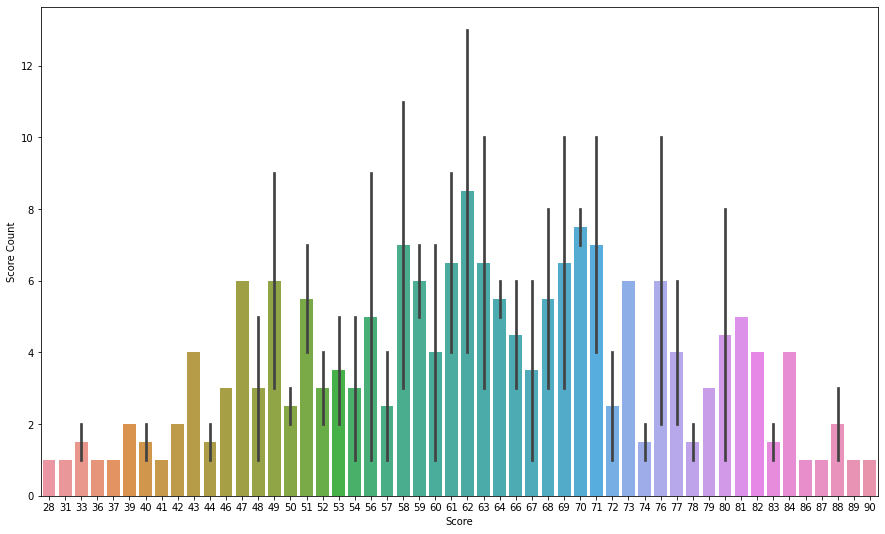

In [102]:
plt.rcParams['figure.figsize']=(15,9)
sns.barplot(x='Score', y='Score Count',data=scores)

## Following are the observations from the above chart - 
1. The most of the contract id (whether the UPSELL is True or False) lies between the 1st std deviation of the above distribution. i.e. Business need to focus on the contract ids' whose score lies between 43 to 76.

### First Model Training Experiment with -
1. 'DELINQUENCY','repayment performance', 'Score'
2. TransformedTargetRegressor

In [119]:
scores_DELINQUENCY_rp =final_df_2.groupby(['Score','DAYS_ON_BOOKS','DELINQUENCY','repayment performance']).size().reset_index().rename(columns={0:'Score Count'})
scores_DELINQUENCY_rp

,Score,DAYS_ON_BOOKS,DELINQUENCY,repayment performance,Score Count
0,28,56,-2,1.035714,1
1,31,49,-1,1.020408,1
2,33,28,-1,0.964286,1
3,33,39,-1,0.153846,1
4,33,52,-1,0.923077,1
...,...,...,...,...,...
330,88,51,-1,0.647059,1
331,88,52,-1,0.288462,1
332,88,52,-1,0.730769,1
333,89,40,-1,1.000000,1


In [120]:
scores_DELINQUENCY_rp.drop(scores_DELINQUENCY_rp.columns[len(scores_DELINQUENCY_rp.columns)-1], axis=1, inplace=True)

In [121]:
scores_DELINQUENCY_rp

,Score,DAYS_ON_BOOKS,DELINQUENCY,repayment performance
0,28,56,-2,1.035714
1,31,49,-1,1.020408
2,33,28,-1,0.964286
3,33,39,-1,0.153846
4,33,52,-1,0.923077
...,...,...,...,...
330,88,51,-1,0.647059
331,88,52,-1,0.288462
332,88,52,-1,0.730769
333,89,40,-1,1.000000


In [122]:
scores_DELINQUENCY_rp = scores_DELINQUENCY_rp[['DELINQUENCY', 'repayment performance', 'Score']]

In [123]:
scores_DELINQUENCY_rp

,DELINQUENCY,repayment performance,Score
0,-2,1.035714,28
1,-1,1.020408,31
2,-1,0.964286,33
3,-1,0.153846,33
4,-1,0.923077,33
...,...,...,...
330,-1,0.647059,88
331,-1,0.288462,88
332,-1,0.730769,88
333,-1,1.000000,89


In [151]:
from numpy import mean
from numpy import absolute
from numpy import loadtxt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split

In [138]:
X, y = scores_DELINQUENCY_rp[['DELINQUENCY', 'repayment performance']], scores_DELINQUENCY_rp['Score']

In [139]:
X

,DELINQUENCY,repayment performance
0,-2,1.035714
1,-1,1.020408
2,-1,0.964286
3,-1,0.153846
4,-1,0.923077
...,...,...
330,-1,0.647059
331,-1,0.288462
332,-1,0.730769
333,-1,1.000000


In [140]:
y

0      28
1      31
2      33
3      33
4      33
       ..
330    88
331    88
332    88
333    89
334    90
Name: Score, Length: 335, dtype: int64

In [141]:
# prepare the model with input scaling
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', HuberRegressor())])

In [142]:
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())

In [143]:
# evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [148]:
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 9.791


In [149]:
type(y)

pandas.core.series.Series

### Second Model Training Experiment with -
1. 'DELINQUENCY','repayment performance', 'Score'
2. PowerTransformer

In [152]:
def powertransformerregressor(X, y):
    # prepare the model with input scaling
    pipeline = Pipeline(steps=[('power', PowerTransformer()), ('model', HuberRegressor())])
    # prepare the model with target scaling
    model = TransformedTargetRegressor(regressor=pipeline, transformer=PowerTransformer())
    # evaluate model
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # convert scores to positive
    scores = absolute(scores)
    # summarize the result
    s_mean = mean(scores)
    print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 9.749


PowerTransformer improves the Accuracy of the Regressor

### Third Model Training Experiment with -
1. 'DAYS_ON_BOOKS','DELINQUENCY','repayment performance', 'Score'
2. PowerTransformer

In [153]:
scores_DELINQUENCY_rp =final_df_2.groupby(['Score','DAYS_ON_BOOKS','DELINQUENCY','repayment performance']).size().reset_index().rename(columns={0:'Score Count'})
scores_DELINQUENCY_rp

,Score,DAYS_ON_BOOKS,DELINQUENCY,repayment performance,Score Count
0,28,56,-2,1.035714,1
1,31,49,-1,1.020408,1
2,33,28,-1,0.964286,1
3,33,39,-1,0.153846,1
4,33,52,-1,0.923077,1
...,...,...,...,...,...
330,88,51,-1,0.647059,1
331,88,52,-1,0.288462,1
332,88,52,-1,0.730769,1
333,89,40,-1,1.000000,1


In [154]:
X, y = scores_DELINQUENCY_rp[['DAYS_ON_BOOKS','DELINQUENCY', 'repayment performance']], scores_DELINQUENCY_rp['Score']

In [175]:
def powertransformerregressor(X, y):
    # prepare the model with input scaling
    pipeline = Pipeline(steps=[('power', PowerTransformer()), ('model', HuberRegressor())])
    # prepare the model with target scaling
    model = TransformedTargetRegressor(regressor=pipeline, transformer=PowerTransformer())
    # evaluate model
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    print(scores)
    # convert scores to positive
    scores = absolute(scores)
    # summarize the result
    s_mean = mean(scores)
    print('Mean MAE: %.3f' % (s_mean))

In [176]:
powertransformerregressor(X, y)

[-10.38131066  -9.1315609   -9.58881877  -9.44604955 -11.22592347
  -8.38885372  -9.46950853 -11.40333207  -9.34368832  -9.83694879]
Mean MAE: 9.822


In [179]:
def normalizetransformerregressor(X, y):
    # prepare the model with input scaling
    pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', HuberRegressor())])
    # prepare the model with target scaling
    model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())
    # evaluate model
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    print(scores)
    # convert scores to positive
    scores = absolute(scores)
    # summarize the result
    s_mean = mean(scores)
    print('Mean MAE: %.3f' % (s_mean))

In [180]:
normalizetransformerregressor(X, y)

[-10.48010329  -9.1577294   -9.93175496  -9.63576265 -11.40098134
  -8.24698776  -9.44083547 -11.48645924  -9.29179984  -9.66072198]
Mean MAE: 9.873


In [ ]:
X, y = scores_DELINQUENCY_rp[['DAYS_ON_BOOKS','DELINQUENCY', 'repayment performance']], scores_DELINQUENCY_rp['Score']

In [184]:
final_df_2

,ContractId Anon,Reliability,Score,BASEUNIT_PRODUCTNAME (copy),ACCESORY_NAME (copy),UPSELL,DAYS_ON_BOOKS,BASEUNIT_CONTRACTSTATUS,DELINQUENCY,TOTAL_TOKEN_PAID,repayment performance
57,31604231,Yes,77,Product 1 (large SHS),TV1,True,57,ACTIVE,11,10,0.175439
115,31610571,Yes,62,Product 1 (large SHS),TV1,False,57,ACTIVE,-1,56,0.982456
172,31620571,Yes,73,Product 1 (large SHS),TV1,True,56,ACTIVE,-2,54,0.964286
229,31622411,Yes,59,Product 1 (large SHS),TV1,True,56,ACTIVE,1,21,0.375000
286,31623051,Yes,78,Product 1 (large SHS),No Accessory,False,56,ACTIVE,-1,53,0.946429
...,...,...,...,...,...,...,...,...,...,...,...
14628,32697791,Yes,70,Product 1 (large SHS),No Accessory,False,22,ACTIVE,-1,22,1.000000
14646,32832611,Yes,49,Product 1 (large SHS),No Accessory,False,17,ACTIVE,0,8,0.470588
14662,32854171,Yes,49,Product 5 (phone - new),No Accessory,False,15,ACTIVE,-44,59,3.933333
14678,32855911,Yes,53,Product 1 (large SHS),No Accessory,False,15,ACTIVE,-5,20,1.333333


## Ploting the regression plot for each independent variable with the dependent variable.

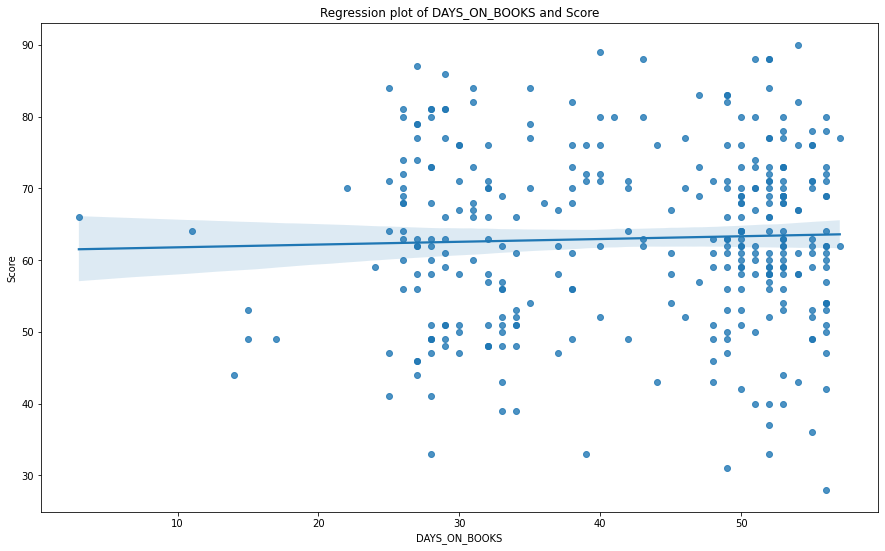

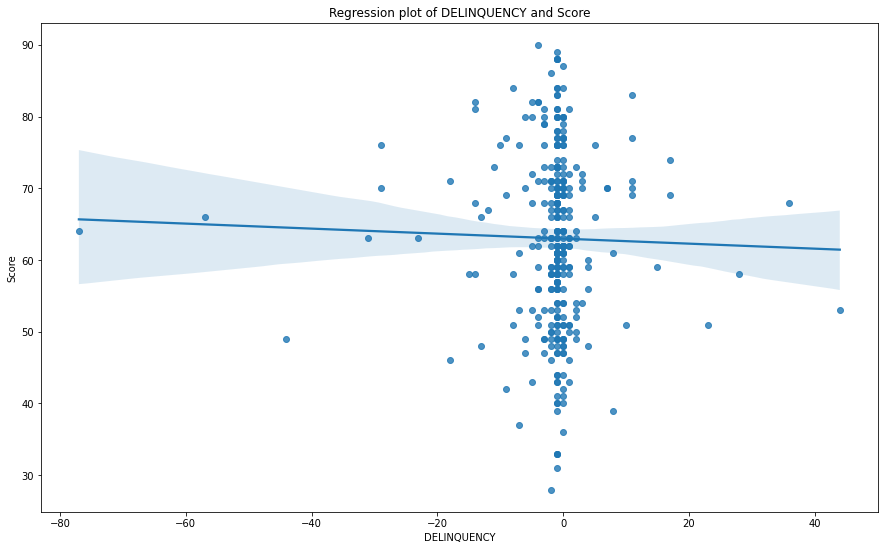

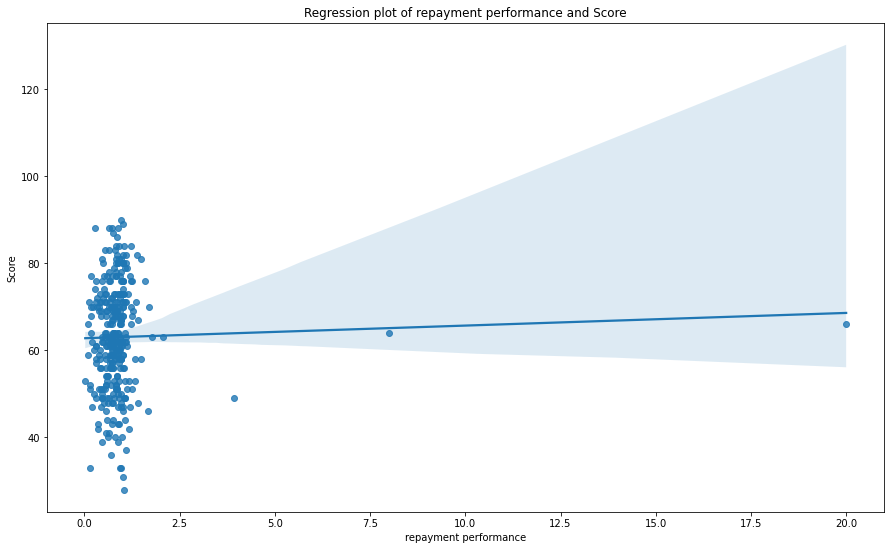

In [185]:
# Ploting the regression plot for each independent variable with the dependent variable.
variables = ['DAYS_ON_BOOKS','DELINQUENCY', 'repayment performance']

for var in variables:
    plt.figure() # Creating a rectangle (figure) for each plot
    # Regression Plot also by default includes
    # best-fitting regression line
    # which can be turned off via `fit_reg=False`
    sns.regplot(x=var, y='Score', data=final_df_2).set(title=f'Regression plot of {var} and Score');

## Observations
1. When looking at the regplots, it seems the 'DAYS_ON_BOOKS' and 'repayment performance' have a weak positive linear relationship with 'Score'. It also seems that the 'DELINQUENCY' has a weak negative linear relationship with 'Score'.

2. In the above scatter plots still there are some outliers. So after discussion with the SMEs we can remove them. After removing them our MAE of the regression model will definitely decrease.

## Next Experiment

In [186]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [188]:
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)

In [189]:
print(X_train) 
print(y_train)

     DAYS_ON_BOOKS  DELINQUENCY  repayment performance
60              33           23               0.151515
226             56            1               0.571429
180             42            0               0.738095
280             39           -1               1.000000
17              44           -5               0.886364
..             ...          ...                    ...
188              3          -57              20.000000
71              55            0               0.818182
106             50           -1               0.920000
270             53           -3               1.037736
102             30           -1               0.666667

[268 rows x 3 columns]
60     51
226    69
180    64
280    76
17     43
       ..
188    66
71     52
106    58
270    73
102    58
Name: Score, Length: 268, dtype: int64


In [192]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_fit=scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_train_scale=pd.DataFrame(X_train_scaled)

In [195]:
y_train.shape

(268,)

In [197]:
X_train_scale.shape

(268, 3)

In [198]:
X_test_scaled=scaler.transform(X_test)
X_test_scale=pd.DataFrame(X_test_scaled)
X_test_scale.shape

(67, 3)

In [196]:
regressor.fit(X_train_scale, y_train)

LinearRegression()

In [199]:
y_pred = regressor.predict(X_test_scale)

In [200]:
y_pred

array([63.62888375, 63.88757486, 63.94009345, 63.81925155, 62.71682622,
       64.02003636, 63.74514079, 63.77808622, 62.42613827, 62.76328751,
       61.90197128, 63.77799021, 63.91364522, 62.42720254, 63.67773264,
       64.03041948, 65.27494782, 63.69156868, 64.05898775, 62.60659792,
       63.8330537 , 63.95992941, 63.75346074, 63.03004322, 64.02187034,
       62.57204551, 63.59472191, 62.32347093, 63.65536908, 62.66334349,
       63.90042111, 63.50852906, 62.88932252, 64.09624348, 64.22797208,
       64.16212703, 63.68767387, 62.52813211, 63.81065649, 62.41813824,
       62.53043993, 62.54021081, 63.78605997, 64.38969277, 63.74510911,
       63.66163762, 62.79069174, 62.4808311 , 63.27871561, 63.77082401,
       62.35748536, 62.51131335, 63.07385059, 63.89052332, 64.04762877,
       62.64852536, 64.10356388, 63.92911473, 63.05406543, 62.48765403,
       63.76294051, 64.15743468, 64.14016585, 63.86948208, 63.69720743,
       64.0742823 , 62.83963329])

In [201]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

     Actual  Predicted
25       46  63.628884
109      58  63.887575
76       53  63.940093
196      66  63.819252
57       51  62.716826
..      ...        ...
298      78  64.140166
294      77  63.869482
116      59  63.697207
78       53  64.074282
244      71  62.839633

[67 rows x 2 columns]


In [204]:
def powertransformerregressor2(X, y):
    # prepare the model with input scaling
    pipeline = Pipeline(steps=[('power', PowerTransformer()), ('model', HuberRegressor())])
    # prepare the model with target scaling
    model = TransformedTargetRegressor(regressor=pipeline, transformer=PowerTransformer())
    
    SEED = 42
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
    print(df_preds)
    # evaluate model
    #cv = KFold(n_splits=10, shuffle=True, random_state=1)
    #scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # convert scores to positive
    #scores = absolute(scores)
    # summarize the result
    #s_mean = mean(scores)
    #print('Mean MAE: %.3f' % (s_mean))

In [206]:
X, y = scores_DELINQUENCY_rp[['DELINQUENCY', 'repayment performance']], scores_DELINQUENCY_rp['Score']
powertransformerregressor2(X, y)

     Actual  Predicted
25       46  63.365743
109      58  64.545410
76       53  64.705681
196      66  60.504092
57       51  64.603952
..      ...        ...
298      78  64.617597
294      77  63.340151
116      59  64.112953
78       53  64.070906
244      71  64.836215

[67 rows x 2 columns]
